In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/data.csv')

# "Commute_Time" 열만 추출해 Series로 만듦
commute_times = df['Commute_Time']

# 기초 통계량 확인
mean_commute = np.mean(commute_times) # 표본 평균
std_commute = np.std(commute_times, ddof=1) # 표본 표준편차

print(f"표본 평균 통근 시간: {mean_commute:.2f}분")
print(f"표본 표준편차 : {std_commute:.2f}분")

표본 평균 통근 시간: 36.06분
표본 표준편차 : 4.50분


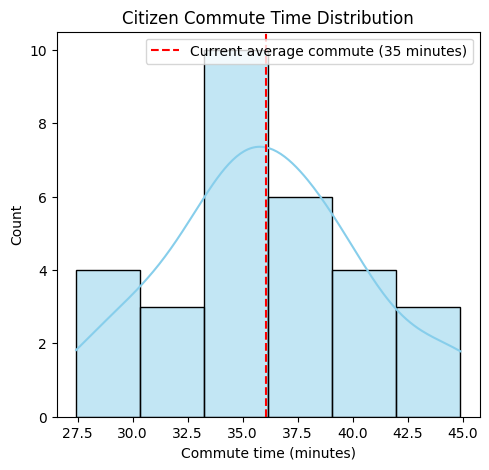

In [3]:
plt.figure(figsize=(12, 5))
# 그래프 크기 설정 (가로, 세로)

plt.subplot(1, 2, 1)
# 서브플롯 설정 (행 개수, 열 개수, 현재 위치)

sns.histplot(commute_times, kde=True, color='skyblue')  
# 히스토그램과 커널 밀도 추정(KDE)을 함께 표시

plt.axvline(x=mean_commute, color='red', linestyle='dashed', label='Current average commute (35 minutes)')
# 특정 값을 기준으로 수직선 추가 (예: 기존 평균 통근 시간)

plt.title('Citizen Commute Time Distribution')  
# 그래프 제목 설정

plt.xlabel('Commute time (minutes)')  
# X축 라벨 설정

plt.legend()  
# 범례 표시

plt.show()  
# 그래프 출력

In [4]:
# 데이터 정규성 검정을 위한 Shapiro-Wilk 검정 수행
stat, p = stats.shapiro(commute_times)  
# commute_times 데이터의 정규성을 검정하는 함수

print(f"Shapiro-Wilk 검정 p-value : {p:.4}")
# p-value가 0.05보다 작으면 정규성을 따르지 않는다고 판단

Shapiro-Wilk 검정 p-value : 0.6868


In [6]:
# 기존 평균 통근 시간(35분)과 비교하여 t-검정 수행
t_stat, p_value = stats.ttest_1samp(commute_times, popmean=35)  
# 단일 표본 t-검정 수행 (popmean에 기존 평균 입력)

print(f"t-통계량: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")
# p-value가 0.05보다 작으면 기존 평균과 통계적으로 유의미한 차이가 있다고 판단

t-통계량: 1.2893
p-value: 0.2075


In [ ]:
# p값이 0.05보다 크므로 기존 평균과 유의미한 차이가 없다고 할 수 있음 따라서 귀무가설을 채택(평균 = 35분)